In [3]:
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt
import numpy as np

# parameters:
nu = 7*10**(-14)

def dipole_ic(xx,yy):
    return (0.1*(-np.exp(-((xx-np.pi/5)**2 + (yy-np.pi+(np.pi/10))**2)*5) 
     +np.exp(-((xx-np.pi/5)**2+(yy-np.pi-np.pi/10)**2)*5)))

def ani_pcol(x):
    plt.pcolor(x)
    plt.colorbar()
    plt.clim(-0.01,0.01)

def PSCN(nx, ny, dt, ic, T, tout):
    
    # retrieve number of grid points
    '''nx = len(x)
    ny = len(y)'''
    
    dx = 2*np.pi/nx
    
    x = np.arange(1,nx+1,1)*dx
    y = x
    
    xx,yy = np.meshgrid(x,y)
    
    # fourier space grid points
    kx1 = np.arange(0,64,1)
    kx2 = np.arange(-64,0,1)
    kx = np.concatenate((kx1,kx2))
    ky = kx
    
    # fourier meshgrid
    kxx, kyy = np.meshgrid(kx,ky)
    
    # dissipation term
    k2 = kxx**2 + kyy**2
    
    # avoiding 0 values as we will divide by this
    k2poisson = k2
    k2poisson = np.where(k2poisson==0, 1, k2poisson)

    # dealiasing mask forcing non-linear terms for kx, ky > 2/3 to be 0
    L = np.ones(k2.shape)
    L_ind = np.where(abs(kxx) > max(kx)*2/3)
    L[L_ind] = 0
    
    # initial condition
    zr = ic(xx,yy)
    
    # fast fourier transform
    zk = fft2(zr)
    
    # get array of times
    time = np.arange(0, T, dt)
    
    # list to hold frames for animation
    frames = []
    ur_save = []
    vr_save = []
    x_pos = []
    y_pos = []
    time_steps = []
    
    for t in time:
        
        psik = -zk / k2poisson
        ur = np.real(ifft2(-1j*kyy*psik))
        z_xr = np.real(ifft2(1j*kxx*zk))
        vr = np.real(ifft2(1j*kxx*psik))
        z_yr = np.real(ifft2(1j*kyy*zk))
        
        nlr=ur*z_xr+vr*z_yr
        nlk=L*fft2(nlr)
        
        zk=((1/dt-nu*(k2**4)/2)*zk-nlk)/(1/dt+nu*(k2**4)/2)
        
        if t%tout==0:
            
            zr = np.real(ifft2(zk))
            frames.append(zr)
            
            ur_save.append(ur)
            vr_save.append(vr)
            x_pos.append(z_xr)
            y_pos.append(z_yr)
            time_steps.append(t)
            
            # FTLE calculator
            
    # plot final pcolor image
    plt.pcolor(zr)
    plt.colorbar()
    plt.clim(-0.01,0.01)
    plt.show()
            
    '''fig = plt.figure()
    animator = ani.FuncAnimation(fig, )'''
    
    return frames, ur_save, vr_save, x_pos, y_pos, time_steps

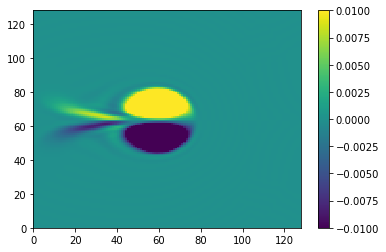

In [4]:
frames, u_dat, v_dat, x_pos, y_pos, _ = PSCN(128,128, 0.1, dipole_ic, 400, 4)

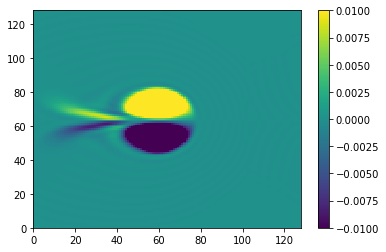

In [15]:
frames[-1]

x = np.where(abs(frames[-1]) > 10**(-10), frames[-1], 0)

plt.pcolor(x)
plt.colorbar()
plt.clim(-0.01,0.01)
plt.show()

In [12]:
frames[-1]

array([[ 2.19918694e-11,  1.36730010e-11, -5.81919689e-12, ...,
         8.50936762e-12,  1.58180818e-11,  2.14974336e-11],
       [ 8.66411836e-12, -6.51668359e-12, -2.95755128e-11, ...,
         1.09380105e-11,  1.51319530e-11,  1.53126601e-11],
       [-2.75375585e-11, -3.70286187e-11, -3.78800413e-11, ...,
         2.51858146e-12, -4.49595135e-12, -1.52539899e-11],
       ...,
       [-8.66421416e-12,  6.51659051e-12,  2.95754271e-11, ...,
        -1.09381068e-11, -1.51320504e-11, -1.53127572e-11],
       [-2.19919662e-11, -1.36730936e-11,  5.81911299e-12, ...,
        -8.50946794e-12, -1.58181821e-11, -2.14975329e-11],
       [-4.85191451e-17, -4.61932321e-17, -4.15853127e-17, ...,
        -5.09091801e-17, -5.06952900e-17, -5.00202754e-17]])

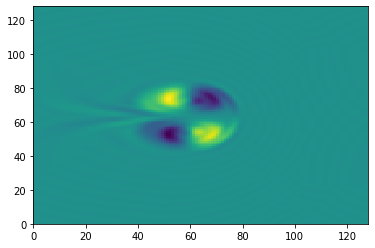

In [21]:
plt.pcolor(x_pos[-1])